In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://github.com/rociochavezmx/Rocio-Chavez-youtube-Files/raw/master/Rios.csv')
data.head()

,Rio,Millas
0,1,735
1,2,320
2,3,325
3,4,392
4,5,524


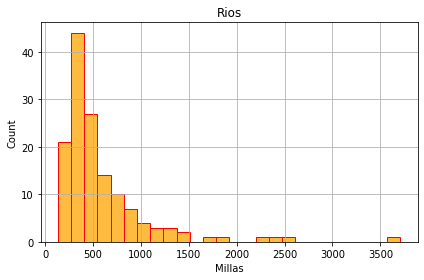

In [3]:
plt.title('Rios')
sns.histplot(data['Millas'], lw=1, edgecolor='red', color='orange')
plt.grid()
plt.tight_layout()

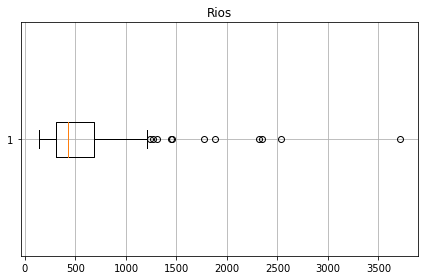

In [4]:
plt.title('Rios')
plt.boxplot(data['Millas'], vert=False)
plt.grid()
plt.tight_layout()

In [5]:
# Estadísticos

Q1 = data['Millas'].quantile(0.25)
print('Primer quartil', Q1)

Q3 = data['Millas'].quantile(0.75)
print('Primer quartil', Q3)

IQR = Q3 - Q1
print('Rango intercuartil', IQR)

Mediana = data['Millas'].mean()
print('Mediana %0.2f' % Mediana)

Valor_Minimo = data['Millas'].min()
print('Valor Mínimo', Valor_Minimo)

Valor_Maximo = data['Millas'].max()
print('Valor Máximo', Valor_Maximo)

Primer quartil 310.0
Primer quartil 680.0
Rango intercuartil 370.0
Mediana 591.18
Valor Mínimo 135
Valor Máximo 3710


In [6]:
# Cota Superior e Inferior

cota_inferior = (Q1 - 1.5 * IQR)
print('Bigote inferior', cota_inferior)

cota_superior = (Q3 + 1.5 * IQR)
print('Bigote superior', cota_superior)

Bigote inferior -245.0
Bigote superior 1235.0


In [7]:
# Índices de outliers

idx_outliers = (data['Millas'] < cota_inferior) | (data['Millas'] > cota_superior)
print(idx_outliers)

0      False
1      False
2      False
3      False
4      False
       ...  
136    False
137    False
138    False
139    False
140     True
Name: Millas, Length: 141, dtype: bool


In [8]:
# Detección de outliers
outliers = data[idx_outliers]
print('Lista de outliers', len(outliers))

Lista de outliers 11


In [9]:
no_outliers = (data['Millas'] >= cota_inferior) &  (data['Millas'] <= cota_superior)
sin_outliers = data[no_outliers]
len(sin_outliers)

130

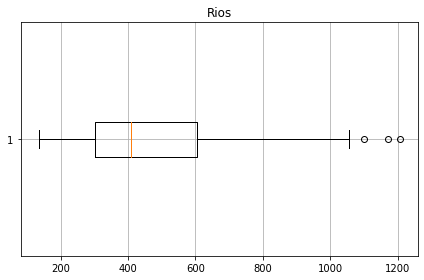

In [10]:
# Boxplot
plt.title('Rios')
plt.boxplot(sin_outliers['Millas'], vert=False)
plt.grid()
plt.tight_layout()

In [11]:
from feature_engine.outliers import OutlierTrimmer

# fold puede ser 1.5 std ó 3 std
outlier = OutlierTrimmer(capping_method='iqr', fold=1.5)
sin_outliers2 = outlier.fit_transform(data)
len(sin_outliers2)

130

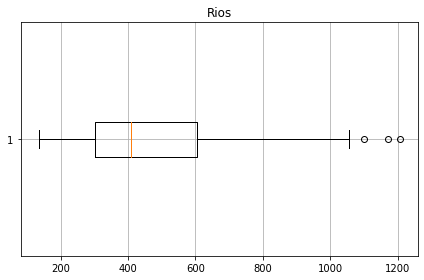

In [12]:
# Boxplot
plt.title('Rios')
plt.boxplot(sin_outliers2['Millas'], vert=False)
plt.grid()
plt.tight_layout()